In [51]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
from torch import optim
import torchvision
from torchvision import transforms

In [2]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [3]:
directory="data"
negative='Negative'
negative_file_path=os.path.join(directory,negative)
negative_file_path
os.listdir(negative_file_path)[0:3]

['00001.jpg', '00002.jpg', '00003.jpg']

In [4]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['data\\Negative\\00001.jpg',
 'data\\Negative\\00002.jpg',
 'data\\Negative\\00003.jpg']

In [6]:
positive="Positive"
positive_file_path = os.path.join(directory,positive)
positive_file_path
os.listdir(positive_file_path)[0:3]
[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path)][0:3]
positive_files = [os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith('.jpg')]
positive_files.sort()
positive_files[0:3]

['data\\Positive\\00001.jpg',
 'data\\Positive\\00002.jpg',
 'data\\Positive\\00003.jpg']

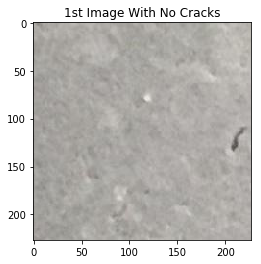

In [8]:
image1 = Image.open(negative_files[0])
plt.imshow(image1)
plt.title("1st Image With No Cracks")
plt.show()

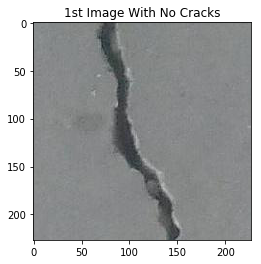

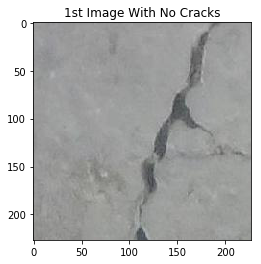

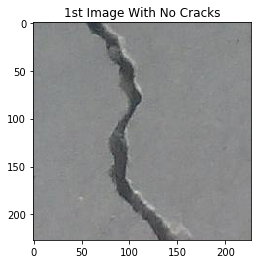

In [14]:
for i in range(3):
    plt.imshow(Image.open(positive_files[i]))
    plt.title("1st Image With No Cracks")
    plt.show()

In [16]:
number_of_samples = len(positive_files)+len(negative_files)
print(number_of_samples)

40000


In [21]:
Y=torch.zeros([number_of_samples])
Y=Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

In [22]:
Y[::2]=1
Y[1::2]=0

In [23]:
print(Y[:5])

tensor([1, 0, 1, 0, 1])


In [27]:
all_files = [0]*number_of_samples
all_files[::2] = positive_files
all_files[1::2] = negative_files

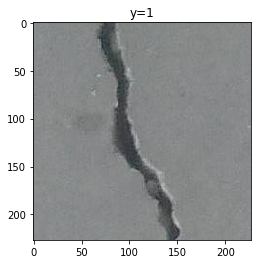

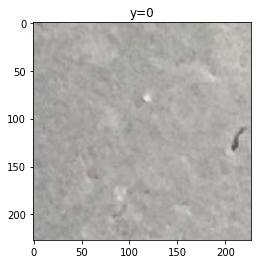

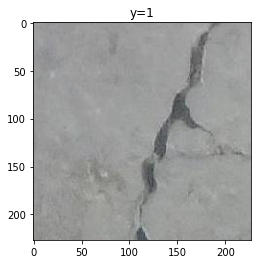

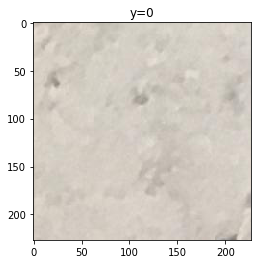

In [28]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [29]:
train=False
if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]

else:
    all_files=all_files[30000:]
    Y=Y[30000:]

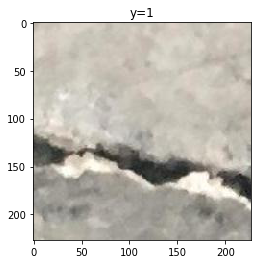

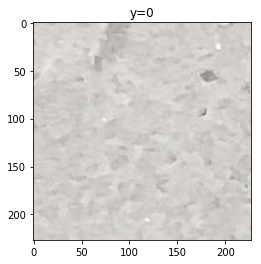

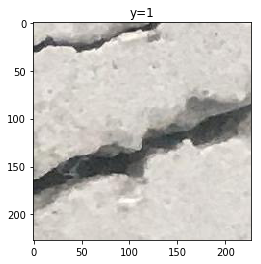

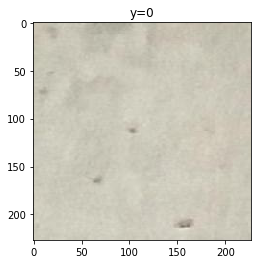

In [30]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title("y="+str(y.item()))
    plt.show()

In [54]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="data"
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()

        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files = self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files = self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)
    
  
            
     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        
        image=Image.open(self.all_files[idx])
        y=self.Y[idx]
          
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [39]:
dataset = Dataset(train=True)

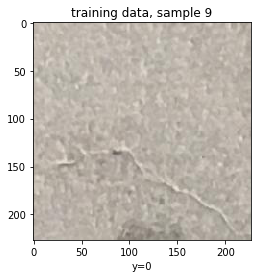

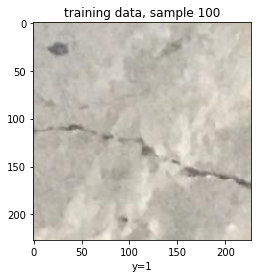

In [40]:
for sample  in [9,100]:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()

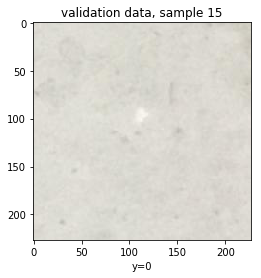

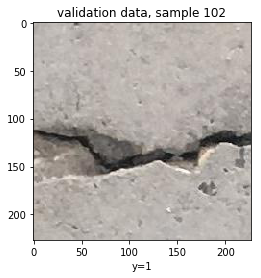

In [41]:
dataset = Dataset(train=False)
for sample  in [15,102]:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("validation data, sample {}".format(int(sample)))
    plt.show()

In [44]:
x = torch.zeros(5,4,4,3)

In [48]:
x.view(x.size(0),-1).shape

torch.Size([5, 48])

In [49]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [70]:
transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])

In [71]:
dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

In [72]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

In [73]:
size_of_image=3*227*227
size_of_image

154587

In [74]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        x = self.linear(x)
        return x

In [75]:
torch.manual_seed(0)

In [76]:
model = Model(size_of_image,2)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.1,momentum=0.1)

In [83]:
train_data = DataLoader(dataset = dataset_train,batch_size=1000)
test_data = DataLoader(dataset = dataset_val,batch_size=1000)

In [79]:
LOSS = []
ACCURACY = []
for epoch in range(5):
    loss_epoch = []
    for x,y in train_data:
        yhat = model(x.view(x.size(0),-1))
        loss = criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_epoch.append(loss.data.item())
    LOSS.append(max)
    accur = 0
    for x_test, y_test in test_data:
        predict = model(x_test.view(x_test.size(0),-1))
        _, yhat = torch.max(predict.data,1)
        accur += (yhat == y_test).sum().item()
    ACCURACY.append(accur/len(dataset_val))

In [82]:
print(ACCURACY)

[0.5529, 0.5529, 0.5529, 0.5529, 0.5529]


In [81]:
import torchvision.models as models

In [109]:
new_model = models.resnet18(pretrained=True)
transform =transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize(mean, std)])


In [110]:
train_dataset=Dataset(transform=transform,train=True)
validation_dataset=Dataset(transform=transform,train=False)

In [111]:
for param in new_model.parameters():
    param.requires_grad = False
new_model.fc = nn.Linear(512,2)

In [112]:
print(new_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [113]:
criterion = nn.CrossEntropyLoss()

In [116]:
train_loader = DataLoader(dataset = train_dataset,batch_size=100)
validation_loader = DataLoader(dataset = validation_dataset,batch_size=100)

In [117]:
optimizer = torch.optim.Adam([parameters  for parameters in new_model.parameters() if parameters.requires_grad],lr=0.001)

In [118]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
#n_epochs

loss=0
for epoch in range(n_epochs):
    for x, y in train_loader:

        new_model.train() 
        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z = new_model(x)
        # calculate loss 
        loss = criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        loss_list.append(loss.data.item())
    correct=0
    for x_test, y_test in validation_loader:
        # set model to eval 
        new_model.eval()
        #make a prediction 
        z = new_model(x_test)
        #find max 
        _, yhat = torch.max(z.data,1)
       
        #Calculate misclassified  samples in mini-batch 
        correct +=(yhat==y_test).sum().item() 
    accuracy=correct/N_test
    accuracy_list.append(accuracy)

In [119]:
print(accuracy_list)

[0.99]


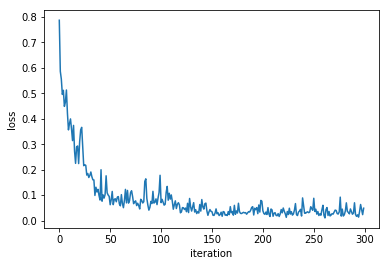

In [120]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

In [160]:
x_test = torch.tensor([validation_dataset[i][0] for i in range(100)])
y_test = torch.tensor([validation_dataset[i][1] for i in range(100)])
new_model.eval()
z = new_model(x_test)
_, yhat = torch.max(z.data,1)
incorrect =(yhat==y_test)

ValueError: only one element tensors can be converted to Python scalars

In [165]:
validation_loader = DataLoader(dataset = validation_dataset,batch_size=1000)
for x_test, y_test in validation_loader:
    # set model to eval 
    new_model.eval()
    #make a prediction 
    z = new_model(x_test)
        #find max 
    _, yhat = torch.max(z.data,1)
       
        #Calculate misclassified  samples in mini-batch 
    incorrect =(yhat!=y_test)
    true = y_test
    break

In [166]:
print(incorrect)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [167]:
miss = []
for i in range(len(incorrect)):
    if incorrect[i]:
        miss.append(i)

In [168]:
print(miss)

[94, 142, 452, 624, 652, 669, 794, 827, 863, 942]


In [171]:
for i in miss:
    print('in sample{} predicted value: {} actual value: {}'.format(i,yhat[i],))

tensor(0)